In [ ]:
library(tidyverse)
library(jsonlite)
library(ggrepel)

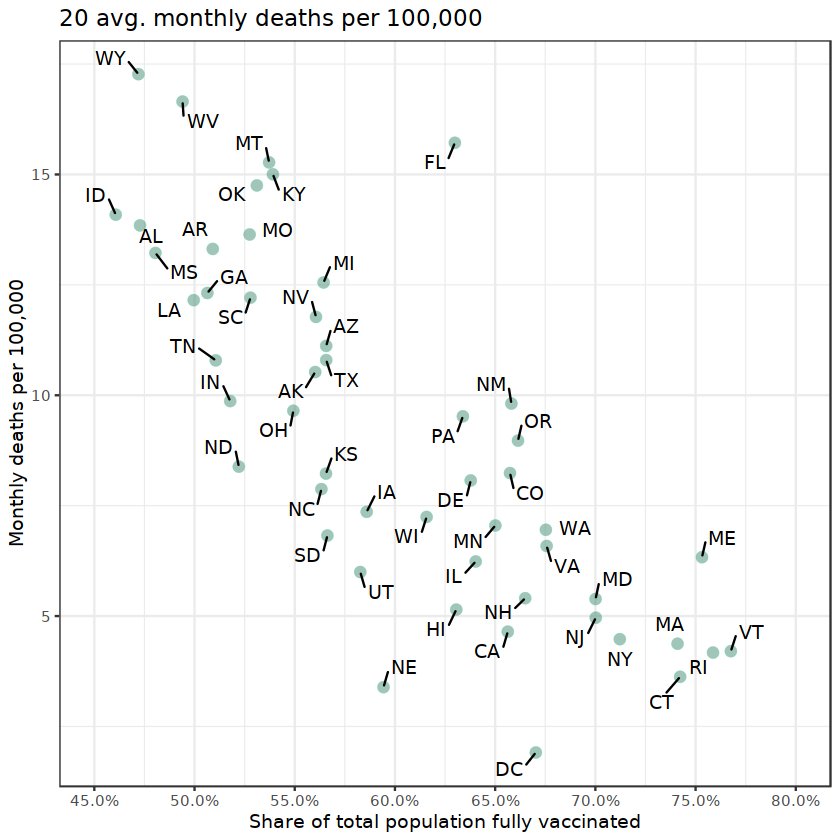

In [2]:
data <- fromJSON("https://static01.nyt.com/newsgraphics/2021/12/20/us-coronavirus-deaths-2021/ff0adde21623e111d8ce103fedecf7ffc7906264/scatter.json")

data$name <- state.abb[match(data$name, state.name)]
data[is.na(data)] <- "DC"

data %>%
  ggplot(aes(x=fully_vaccinated_pct_of_pop, y=deaths_per_100k, label = name)) +
  geom_point(size = 3, shape = 21, col="aquamarine3", fill = "aquamarine4", stroke = 0.2, alpha = 0.5) +
  geom_text_repel(aes(label = name), 
                                        box.padding = unit(0.45, "lines")) +
  scale_x_continuous(labels = scales::percent, limits=c(0.45, 0.80), breaks=seq(0.45, 0.80, by = 0.05)) +
  labs(title="20 avg. monthly deaths per 100,000",
       x ="Share of total population fully vaccinated",
       y = "Monthly deaths per 100,000") +
  theme_bw()


Call:
lm(formula = deaths_per_100k ~ fully_vaccinated_pct_of_pop, data = data)

Coefficients:
                (Intercept)  fully_vaccinated_pct_of_pop  
                      31.15                       -36.66  


`geom_smooth()` using formula 'y ~ x'



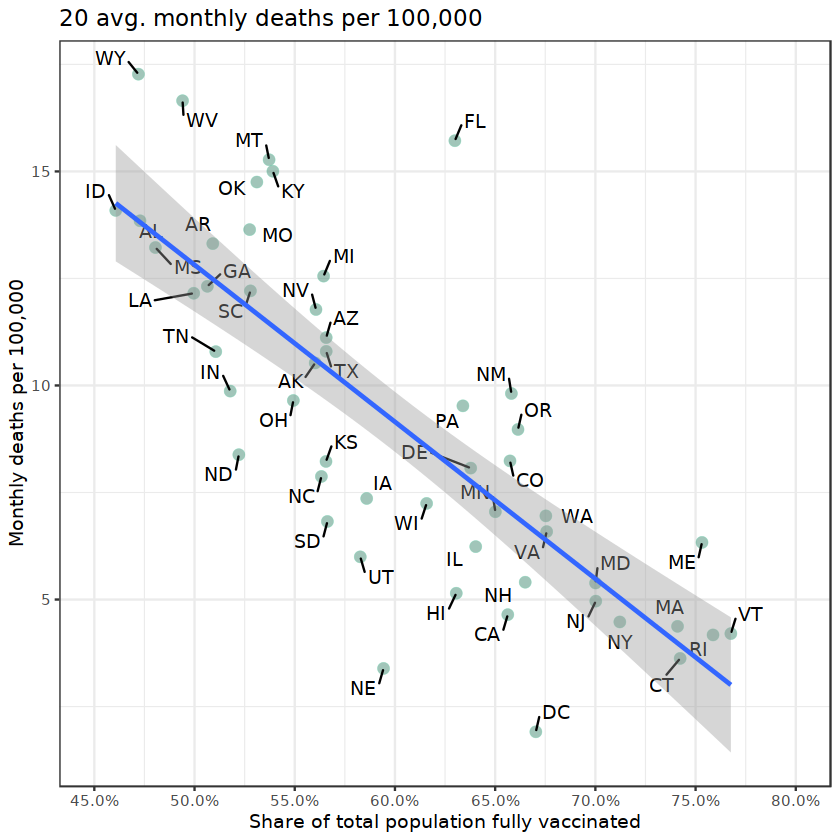

In [3]:
lm(deaths_per_100k ~ fully_vaccinated_pct_of_pop, data = data)

data %>%
  ggplot(aes(x=fully_vaccinated_pct_of_pop, y=deaths_per_100k, label = name)) +
  geom_point(size = 3, shape = 21, col="aquamarine3", fill = "aquamarine4", stroke = 0.2, alpha = 0.5) +
  geom_text_repel(aes(label = name), box.padding = unit(0.45, "lines")) +
  geom_smooth(method = lm) +
  scale_x_continuous(labels = scales::percent, limits=c(0.45, 0.80), breaks=seq(0.45, 0.80, by = 0.05)) +
  labs(title="20 avg. monthly deaths per 100,000",
       x ="Share of total population fully vaccinated",
       y = "Monthly deaths per 100,000") +
  theme_bw()

Den tilpassede linjen viser en tydelig sammenheng mellom den prosentvise vaksinerte andelen av befolkningen og månedlige dødsfall per 100 000. Antall dødsfall synker samtidig som den prosentvise andelen vaksinerte øker.